In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [595]:
df = pd.read_csv('Heart Disease data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## No Null Values

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [597]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Dataset Info

1. **Age**: This is how old you are.

2. **Sex**: This tells if you are male or female.

3. **Chest Pain Type**: There are four types of chest pain:
   - Type 1: Typical angina (pain from the heart)
   - Type 2: Atypical angina (pain not from the heart)
   - Type 3: Non-anginal pain (other chest pain)
   - Type 4: Asymptomatic (no chest pain)

4. **Resting Blood Pressure**: This is the pressure of your blood when you are at rest, measured in millimeters of mercury (mmHg).

5. **Serum Cholesterol**: This measures the amount of cholesterol (a type of fat) in your blood, measured in milligrams per deciliter (mg/dL).

6. **Fasting Blood Sugar**: This checks if your blood sugar level is higher than 120 mg/dL after not eating for a while. If it is higher, it means your blood sugar is high.

7. **Resting Electrocardiographic Results**: This is a test that measures the electrical activity of your heart:
   - 0: Normal
   - 1: Having ST-T wave abnormality (possible sign of heart problems)
   - 2: Showing left ventricular hypertrophy (a condition where the heart muscle is thickened)

8. **Maximum Heart Rate Achieved**: This is the highest number of times your heart beats in one minute during exercise.

9. **Exercise-Induced Angina**: This tells if you had chest pain (angina) caused by exercise. 

10. **Oldpeak**: This measures the amount of ST depression (a specific change seen in the heart's electrical activity) during exercise compared to when you are at rest. It's like seeing how much your heart's signal drops during exercise.

11. **The Slope of the Peak Exercise ST Segment**: This looks at the direction of the ST segment on an ECG during exercise:
    - 0: Upsloping (usually normal)
    - 1: Flat (could be a sign of heart problems)
    - 2: Downsloping (more likely a sign of heart problems)

12. **Number of Major Vessels Colored by Fluoroscopy**: This counts the main blood vessels in your heart that are visible using a special X-ray test:
    - 0 to 3: The number of major vessels (higher number could mean more blockages)

13. **Thal**: This looks at a specific heart condition:
    - 0: Normal
    - 1: Fixed defect (a permanent area of damage in the heart)
    - 2: Reversible defect (an area of the heart that can become normal again)



In [598]:
df = df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thal',
    'target': 'Target'
})


In [599]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### No Imbalanced Data

In [600]:
# Decoding Target
def target_text(row):
    if row == 0:
        return "Absent"
    else:
        return "Present"

df['Target_cat'] = df['Target'].apply(target_text)

In [601]:
df.Target_cat.value_counts()

Present    526
Absent     499
Name: Target_cat, dtype: int64

## Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

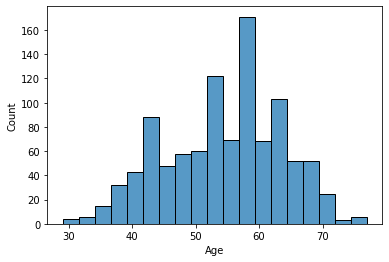

In [602]:
# Age is almost normally distributed no Outliers
sns.histplot(df['Age'])

In [603]:
# Converting age to age slabs to better visulaization
def age_slabs(row):
    if row <= 35:
        return "Young"
    elif row > 35 and row <= 55:
        return "Middle Age"
    else:
        return "Elderly"

df['Age_slabs'] = df['Age'].apply(age_slabs)

df.Age_slabs.value_counts()

Elderly       519
Middle Age    481
Young          25
Name: Age_slabs, dtype: int64

# Sex

In [604]:
def sex_cat(row):
    if row == 1:
        return "Male"
    else:
        return "Female"
    
df["Sex"] = df["Sex"].apply(sex_cat)

In [605]:
# Males having higher counts of heart disease
df[df['Target_cat']=='Present'].Sex.value_counts()

Male      300
Female    226
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

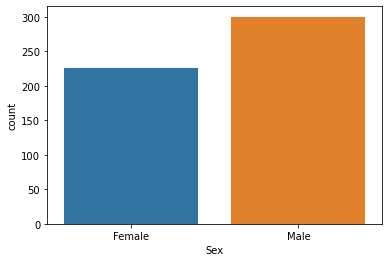

In [606]:
sns.countplot(df[df['Target_cat']=="Present"]['Sex'])

## Chest pain

In [607]:
df.ChestPainType.value_counts()

0    497
2    284
1    167
3     77
Name: ChestPainType, dtype: int64

In [608]:
# decoding chest pain feature for better understanding
def cat_chestPain(row):
    if row == 0:
        return "Typical Angina"
    elif row == 1:
        return "Atypical Angina"
    elif row == 2:
        return "Non-Anginal Pain"
    else:
        return "Asymptomatic"

In [609]:
df['ChestPainType'] = df.ChestPainType.apply(cat_chestPain)

In [610]:
df['ChestPainType'].value_counts()

Typical Angina      497
Non-Anginal Pain    284
Atypical Angina     167
Asymptomatic         77
Name: ChestPainType, dtype: int64

# Resting Blood Pressure

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

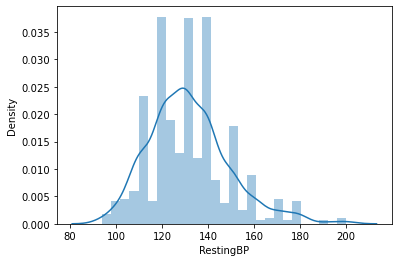

In [611]:
sns.distplot(df.RestingBP)

<AxesSubplot:xlabel='RestingBP'>

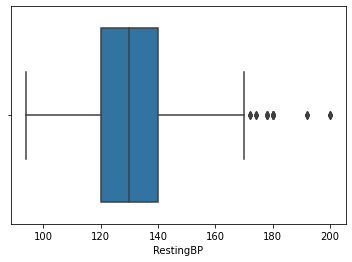

In [612]:
# there are some outliers
sns.boxplot(df.RestingBP)

In [613]:
# I found 180 to be the sweet spot so like that I won't be losing a major chunk of the data
df = df[df['RestingBP'] < 180]

# Cholestrol

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

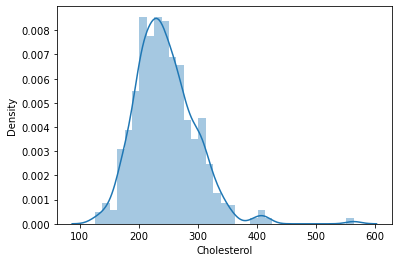

In [614]:
sns.distplot(df.Cholesterol)

<AxesSubplot:xlabel='Cholesterol'>

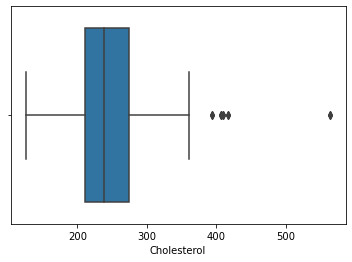

In [615]:
sns.boxplot(df.Cholesterol)

In [616]:
# I found 400 to be the sweet spot so like that I won't be losing a major chunk of the data
df = df[df['Cholesterol'] < 400 ]

# Fasting blood Sugar > 120 mg/dl

<AxesSubplot:xlabel='FastingBS', ylabel='Density'>

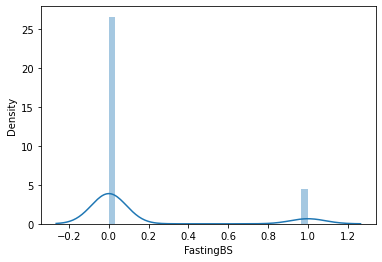

In [617]:
sns.distplot(df.FastingBS)

<AxesSubplot:xlabel='FastingBS'>

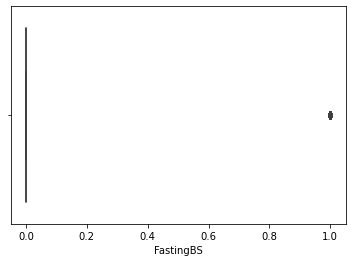

In [618]:
sns.boxplot(df.FastingBS)

### This is a higly skewed data and we might not find use for it either nevertheless i'll keep it if it shows any correlation with the target or not

# Resting Electrocardiographic Results

In [619]:
df.RestingECG.value_counts()

1    510
0    474
2     11
Name: RestingECG, dtype: int64

In [620]:
def cat_restecg(row):
    if row == 0:
        return "Normal"
    elif row == 1:
        return "ST-T abnormality"
    else:
        return "LV hypertrophy"

df['RestingECG'] = df['RestingECG'].apply(cat_restecg)

In [621]:
df.RestingECG.value_counts()

ST-T abnormality    510
Normal              474
LV hypertrophy       11
Name: RestingECG, dtype: int64

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

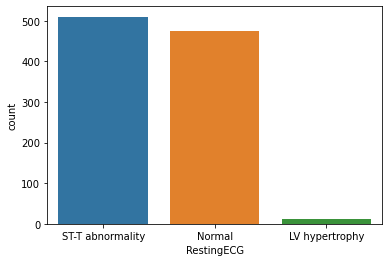

In [622]:
# Normal restecg is showing almost equal counts to ST-T abnormality means those who have normal results 
# are also affected by heart diseases
sns.countplot(df.RestingECG)

# Thalach (Maximum Heart Rate Achieved)

<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

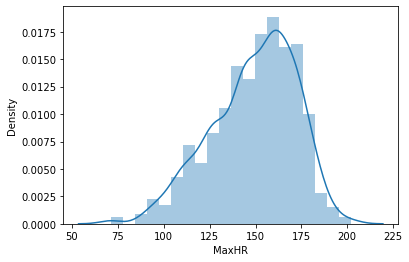

In [623]:
sns.distplot(df.MaxHR)

<AxesSubplot:xlabel='MaxHR'>

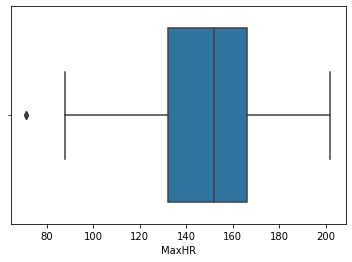

In [624]:
sns.boxplot(df.MaxHR)

In [625]:
# I found 80 to be the sweet spot so like that I won't be losing a major chunk of the data
df = df[df['MaxHR'] > 80]

# Oldpeak (St Depression)

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

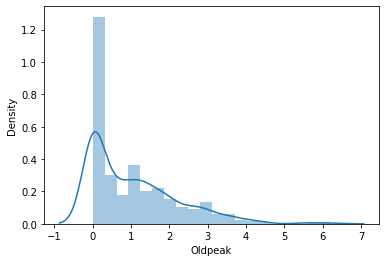

In [626]:
sns.distplot(df.Oldpeak)

<AxesSubplot:xlabel='Oldpeak'>

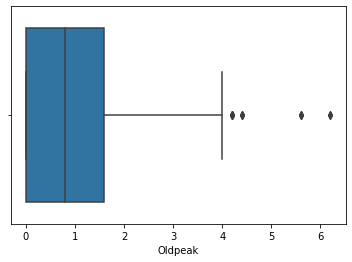

In [627]:
sns.boxplot(df.Oldpeak)

In [628]:
# I found 5 to be the sweet spot so like that I won't be losing a major chunk of the data
df = df[df['Oldpeak'] < 5 ]

# Correlation with eachother

<AxesSubplot:>

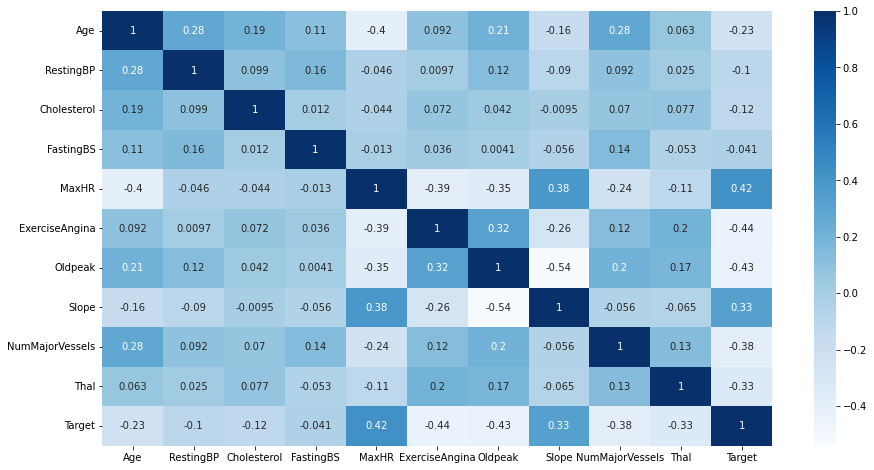

In [629]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [630]:
# Obsering the heatmap above that there is a correlation between age and max_heart_rate_achieved with negative 
# correlation of -0.4

In [631]:
# Data has been almost cleaned and now the analysis is done on Powerbi
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,Slope,NumMajorVessels,Thal,Target,Target_cat,Age_slabs
0,52,Male,Typical Angina,125,212,0,ST-T abnormality,168,0,1.0,2,2,3,0,Absent,Middle Age
1,53,Male,Typical Angina,140,203,1,Normal,155,1,3.1,0,0,3,0,Absent,Middle Age
2,70,Male,Typical Angina,145,174,0,ST-T abnormality,125,1,2.6,0,0,3,0,Absent,Elderly
3,61,Male,Typical Angina,148,203,0,ST-T abnormality,161,0,0.0,2,1,3,0,Absent,Elderly
4,62,Female,Typical Angina,138,294,1,ST-T abnormality,106,0,1.9,1,3,2,0,Absent,Elderly


In [634]:
df.to_csv('Cleaned Heart Disease.csv',index=False)